<a href="https://colab.research.google.com/github/itallocastro/analyzing-vaccination-data/blob/main/DadosVacinacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -P '/content/drive/MyDrive/Colab Notebooks/Ciência de dados/Covid/' https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-16/uf%3DAL/part-00000-f3588c19-4ab8-42b1-86e7-7ff9ab4ff9b2.c000.csv

--2021-05-17 14:02:01--  https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-05-16/uf%3DAL/part-00000-f3588c19-4ab8-42b1-86e7-7ff9ab4ff9b2.c000.csv
Resolving s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)... 52.95.165.54
Connecting to s3-sa-east-1.amazonaws.com (s3-sa-east-1.amazonaws.com)|52.95.165.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 420183713 (401M) [text/csv]
Saving to: ‘/content/drive/MyDrive/Colab Notebooks/Ciência de dados/Covid/part-00000-f3588c19-4ab8-42b1-86e7-7ff9ab4ff9b2.c000.csv’

part-00000-f3588c19 100%[===================>] 400.72M  20.0MB/s    in 23s     

2021-05-17 14:02:25 (17.2 MB/s) - ‘/content/drive/MyDrive/Colab Notebooks/Ciência de dados/Covid/part-00000-f3588c19-4ab8-42b1-86e7-7ff9ab4ff9b2.c000.csv’ saved [420183713/420183713]



In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

## lendo dados da vacinação em alagoas

In [ ]:
df_vacinacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ciência de dados/Covid/part-00000-f3588c19-4ab8-42b1-86e7-7ff9ab4ff9b2.c000.csv', sep=';')

In [ ]:
df_vacinacao.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,9df581a6-38cb-4d22-9b64-de8c2403c38e-i0b0,90f7e07244966c6e990f9302d605edf604de77c65ad1ee...,47,1974-01-17,F,1,BRANCA,280570.0,10.0,PROPRIA,BRASIL,SE,49900.0,B,6991912,PREFEITURA MUNICIPAL DE PORTO REAL DO COLEGIO,UNIDADE BASICA DE SAUDE DEMERON DOS SANTOS,270750,PORTO REAL DO COLEGIO,AL,801,Ensino Básico,8.0,Trabalhadores da Educação,214VCD052W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-12,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-15T01:51:19.000Z,NaN
1,d9ef97bc-20b4-4850-b1bb-ed10b5dc68fb-i0b0,c5a2ea88a3d3d71cdd92b679da23c0866e5d2bb80929b2...,66,1955-03-08,M,99,SEM INFORMACAO,270430.0,10.0,MACEIO,BRASIL,AL,57040.0,B,2009765,PREFEITURA MUNICIPAL DE MACEIO,DISTRITO SANITARIO,270430,MACEIO,AL,202,Pessoas de 65 a 69 anos,2.0,Faixa Etária,210141,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-23T14:35:29.000Z,NaN
2,7d9f033c-e4dc-469a-925e-314ae2fcd41f-i0b0,d272e3df2ec45d059c6881dcca96fc1aea6ac6c897f552...,89,1932-05-06,M,1,BRANCA,270255.0,10.0,ESTRELA DE ALAGOAS,BRASIL,AL,57625.0,B,2003422,PREFEITURA MUNICIPAL DE ESTRELA DE ALAGOAS,CENTRO DE SAUDE DR GASTAO LEAO REGO,270255,ESTRELA DE ALAGOAS,AL,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,213VCD009VA,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-10,2ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-15T01:29:07.000Z,NaN
3,b07684b8-11d6-4d31-88bb-6c5fe5eda31c-i0b0,e9a1ac482b77778ebf5c51f5f354e5495329578d3197b2...,71,1949-04-23,F,1,BRANCA,270630.0,10.0,PALMEIRA DOS INDIOS,BRASIL,AL,57602.0,B,2010569,SECRETARIA MUNICIPAL DE SAUDE PALMEIRA DOS INDIOS,USF CENTRO,270630,PALMEIRA DOS INDIOS,AL,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,210110,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-20,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-23T02:47:17.000Z,NaN
4,5dfd9321-6708-4ef1-a268-6e489890f242-i0b0,e1473ef9f30258c8fdb27a764af5c38f3b27493222ab02...,89,1931-12-23,F,1,BRANCA,270255.0,10.0,ESTRELA DE ALAGOAS,BRASIL,AL,57625.0,B,2003422,PREFEITURA MUNICIPAL DE ESTRELA DE ALAGOAS,CENTRO DE SAUDE DR GASTAO LEAO REGO,270255,ESTRELA DE ALAGOAS,AL,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,213VCD009VA,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-05-10,2ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-15T01:24:57.000Z,NaN


In [ ]:
df_vacinacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776089 entries, 0 to 776088
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   document_id                               776089 non-null  object 
 1   paciente_id                               776089 non-null  object 
 2   paciente_idade                            776089 non-null  int64  
 3   paciente_datanascimento                   776089 non-null  object 
 4   paciente_enumsexobiologico                776089 non-null  object 
 5   paciente_racacor_codigo                   776089 non-null  int64  
 6   paciente_racacor_valor                    776089 non-null  object 
 7   paciente_endereco_coibgemunicipio         772844 non-null  float64
 8   paciente_endereco_copais                  772885 non-null  float64
 9   paciente_endereco_nmmunicipio             772848 non-null  object 
 10  paciente_endereco_nm

In [ ]:
df_vacinacao.drop(['estabelecimento_valor', 'estabelecimento_razaosocial', 'estalecimento_nofantasia', 'estabelecimento_municipio_codigo', 'vacina_fabricante_referencia','id_sistema_origem', 'document_id','paciente_endereco_coibgemunicipio','paciente_endereco_copais','paciente_endereco_nmpais','paciente_endereco_uf','paciente_endereco_cep','paciente_nacionalidade_enumnacionalidade'],axis=1, inplace=True)

In [ ]:
df_vacinacao.head(1)

,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_nmmunicipio,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
0,90f7e07244966c6e990f9302d605edf604de77c65ad1ee...,47,1974-01-17,F,1,BRANCA,PROPRIA,PORTO REAL DO COLEGIO,AL,801,Ensino Básico,8.0,Trabalhadores da Educação,214VCD052W,FUNDACAO OSWALDO CRUZ,2021-05-12,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-05-15T01:51:19.000Z


In [ ]:
df_vacinacao.shape

(776089, 21)

In [ ]:
df_vacinacao.isnull().sum()

paciente_id                          0
paciente_idade                       0
paciente_datanascimento              0
paciente_enumsexobiologico           0
paciente_racacor_codigo              0
paciente_racacor_valor               0
paciente_endereco_nmmunicipio     3241
estabelecimento_municipio_nome       0
estabelecimento_uf                   0
vacina_grupoatendimento_codigo       0
vacina_grupoatendimento_nome      2995
vacina_categoria_codigo           2995
vacina_categoria_nome             3740
vacina_lote                          0
vacina_fabricante_nome               0
vacina_dataaplicacao                 0
vacina_descricao_dose                0
vacina_codigo                        0
vacina_nome                          0
sistema_origem                       0
data_importacao_rnds                 0
dtype: int64

### Frequência de fabricantes de vacinas aplicadas

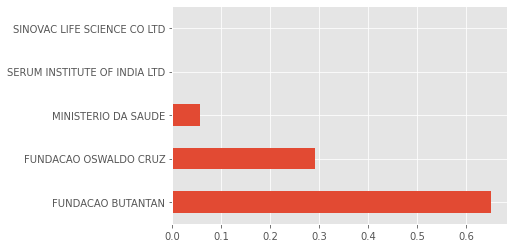

In [ ]:
df_vacinacao['vacina_fabricante_nome'].value_counts(normalize=True).plot(kind='barh')

### Frequência de vacinas aplicadas

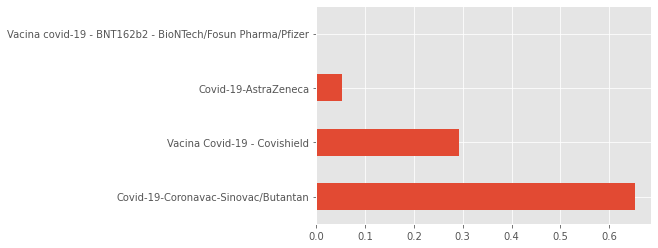

In [ ]:
df_vacinacao['vacina_nome'].value_counts(normalize=True).plot(kind='barh')

### Criando coluna de em qual semana foi aplicada a vacina

In [ ]:
df_vacinacao['vacina_dataAplicacao_semana_ano'] = pd.to_datetime(df_vacinacao['vacina_dataaplicacao']).dt.isocalendar().week
df_vacinacao['vacina_dataAplicacao_dia_semana'] = pd.to_datetime(df_vacinacao['vacina_dataaplicacao']).dt.dayofweek

In [ ]:
df_vacinacao['vacina_dataAplicacao_semana_ano'].head()

0    19
1    16
2    19
3    16
4    19
Name: vacina_dataAplicacao_semana_ano, dtype: UInt32

In [ ]:
df_vacinacao['vacina_dataAplicacao_dia_semana'].head()

0    2
1    4
2    0
3    1
4    0
Name: vacina_dataAplicacao_dia_semana, dtype: int64

In [ ]:
df_vacinacao.sort_values(by='vacina_dataaplicacao', inplace=True)

In [ ]:
df_vacinacao['vacina_dataaplicacao']

643469    2021-01-17
246373    2021-01-18
737684    2021-01-18
775474    2021-01-18
51458     2021-01-18
             ...    
340775    2021-05-15
340772    2021-05-15
85131     2021-05-15
340988    2021-05-15
86091     2021-05-15
Name: vacina_dataaplicacao, Length: 776089, dtype: object

## Gráfico de barra de aplicações da vacina por semana do ano

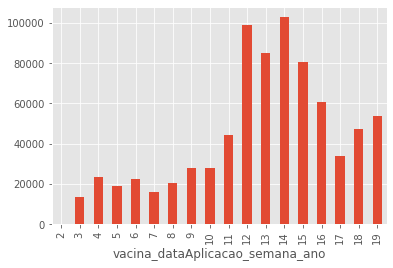

In [ ]:
df_vacinacao['vacina_descricao_dose'].groupby(df_vacinacao['vacina_dataAplicacao_semana_ano']).count().plot(kind='bar')

## Formatando datas de aplicacação para YYYY-mm-dd

In [ ]:
df_vacinacao['vacina_dataaplicacao'] = pd.to_datetime(df_vacinacao['vacina_dataaplicacao']).dt.date

In [ ]:
df_vacinacao['vacina_dataaplicacao'].head()

643469    2021-01-17
246373    2021-01-18
737684    2021-01-18
775474    2021-01-18
51458     2021-01-18
Name: vacina_dataaplicacao, dtype: object

## Verificando se os pacientes tomaram mais de duas doses

In [ ]:
paciente_quantidade = df_vacinacao.groupby(['paciente_id']).agg('count').sort_values(by='paciente_idade', ascending=False)
paciente_quantidade.head()

,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_nmmunicipio,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,vacina_dataAplicacao_semana_ano,vacina_dataAplicacao_dia_semana
paciente_id,,,,,,,,,,,,,,,,,,,,,,
3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f32f07f7807da5564299,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
625b5b99f2b46e4e03a23e3600d66a4028f639ab0b58073461cfff5f3beb3db7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
b131ed60c7f0f6f24987850301cd4cf51a78ae6bfbfac5cbe2cde4d524d7e2a7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
872fea6f06a89ad8179f5582413892b377f6700a0d52cdfa0aa68b9f97ba8ffc,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
732e7f2802db2d332dc0969653c43725eb19c3c79270434f45d6ac858ed2aa89,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
paciente_quantidade.shape

(536728, 22)

In [ ]:
paciente_quantidade[paciente_quantidade['paciente_idade'] > 2].shape

(1524, 22)

In [ ]:
df_vacinacao[df_vacinacao['paciente_id'] == 'e7eb79a0e1ec2a4b3096aaa7a3758b2acb7247c45afbf54b9e3ecedc11c90412']

,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_nmmunicipio,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,vacina_dataAplicacao_semana_ano,vacina_dataAplicacao_dia_semana
96972,e7eb79a0e1ec2a4b3096aaa7a3758b2acb7247c45afbf5...,58,1962-10-30,F,3,PARDA,JABOATAO DOS GUARARAPES,MACEIO,AL,926,Outros,9.0,Trabalhadores de Saúde,202009013,SERUM INSTITUTE OF INDIA LTD,2021-02-22,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-02T20:31:14.000Z,8,0
505792,e7eb79a0e1ec2a4b3096aaa7a3758b2acb7247c45afbf5...,58,1962-10-30,F,3,PARDA,JABOATAO DOS GUARARAPES,MACEIO,AL,926,Outros,9.0,Trabalhadores de Saúde,202009013,FUNDACAO BUTANTAN,2021-02-22,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-24T13:22:24.000Z,8,0
31725,e7eb79a0e1ec2a4b3096aaa7a3758b2acb7247c45afbf5...,58,1962-10-30,F,3,PARDA,JABOATAO DOS GUARARAPES,MACEIO,AL,926,Outros,9.0,Trabalhadores de Saúde,202009013,FUNDACAO BUTANTAN,2021-03-15,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-03-15T16:56:28.000Z,11,0
491603,e7eb79a0e1ec2a4b3096aaa7a3758b2acb7247c45afbf5...,58,1962-10-30,F,3,PARDA,JABOATAO DOS GUARARAPES,MACEIO,AL,926,Outros,9.0,Trabalhadores de Saúde,202009013,SERUM INSTITUTE OF INDIA LTD,2021-03-15,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-18T12:45:02.000Z,11,0


In [ ]:
df_vacinacao.shape

(776089, 23)

### Removendo duplicatas

In [ ]:
new_df_vacinacao = df_vacinacao.drop_duplicates(subset=['paciente_id', 'paciente_idade','paciente_datanascimento', 'paciente_enumsexobiologico', 'vacina_dataaplicacao', 'vacina_descricao_dose'])
new_df_vacinacao.shape

(774189, 23)

In [ ]:
paciente_quantidade_new = new_df_vacinacao.groupby(['paciente_id']).agg('count').sort_values(by='paciente_idade', ascending = False)
paciente_quantidade_new.head()

,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_nmmunicipio,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,vacina_dataAplicacao_semana_ano,vacina_dataAplicacao_dia_semana
paciente_id,,,,,,,,,,,,,,,,,,,,,,
3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f32f07f7807da5564299,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
aa61adc897068e7d91c031b6817736431041f195d6e2724d63cbf36e9d2e1730,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
673b44d9095760268b8c418172ee14f5c08c19448f1e4c127bc33ca2e6c79464,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
9a6541bd8107a77568121068822559ff1ef3cad3c87904743ad18ac53703a0f0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1f21ec47cb44cfa53af82aba6c644837b788faf6a81cd3023ee1fb9359c7b06c,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
paciente_quantidade_new[paciente_quantidade_new['paciente_idade'] > 2].shape

(460, 22)

In [ ]:
new_df_vacinacao[new_df_vacinacao['paciente_id'] == '3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f32f07f7807da5564299'][['paciente_id','vacina_dataaplicacao', 'vacina_descricao_dose', 'sistema_origem']]

,paciente_id,vacina_dataaplicacao,vacina_descricao_dose,sistema_origem
719332,3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f3...,2021-01-21,1ª Dose,Novo PNI
765972,3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f3...,2021-02-01,1ª Dose,ESUS APS - NACIONAL (OFFLINE)
670422,3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f3...,2021-02-11,2ª Dose,Novo PNI
482087,3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f3...,2021-02-22,1ª Dose,ESUS APS - NACIONAL (OFFLINE)
737283,3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f3...,2021-03-02,2ª Dose,ESUS APS - NACIONAL (OFFLINE)


### Nova remoção

In [ ]:
nova_remocao = new_df_vacinacao.drop_duplicates(subset=['paciente_id', 'vacina_descricao_dose'])

In [ ]:
nova_remocao.shape

(773497, 23)

In [ ]:
nova_remocao.groupby(['paciente_id']).agg('count').sort_values(by='paciente_idade', ascending = False)

,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_nmmunicipio,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,vacina_dataAplicacao_semana_ano,vacina_dataAplicacao_dia_semana
paciente_id,,,,,,,,,,,,,,,,,,,,,,
7ff7ee84a8b6260670c1d195cd9a8a9734d4ca86c87bc3456c985b9b9c6dc5ec,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
897f4a54833504bc981677038649d9b7a87c18b7c918db7862d40efcf8b19f86,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
898c422baab85fd62e1bbef108832a5281eb7239e790f01ee3f249281ef9d833,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
898c289e8ebf33adaf4a5a0ed06e04fcc66b76f77624f081de04ca320966a0b5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
898be32cd6ac298d19cf963be7679c80fed7a97116b81dfb5080b6f2fd6cbe2e,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8fe43aa9080b714e6050c4e68885c466e95c42b95b5708bd45d2f004a5ce14cf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8fe3f92895e8644da43fc91859881ed35a1047236346a9c5ecb7d3825f438b14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8fe3f0e5208a31f907319016e6c5eff124c68d57187e3347087400a04aaedb9b,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
nova_remocao[new_df_vacinacao['paciente_id'] == '3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f32f07f7807da5564299'][['paciente_id','vacina_dataaplicacao', 'vacina_descricao_dose', 'sistema_origem', 'vacina_nome']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,paciente_id,vacina_dataaplicacao,vacina_descricao_dose,sistema_origem,vacina_nome
719332,3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f3...,2021-01-21,1ª Dose,Novo PNI,Covid-19-Coronavac-Sinovac/Butantan
670422,3d9c6ce92db5126fcb846ebbe7b956282730ddefdd60f3...,2021-02-11,2ª Dose,Novo PNI,Covid-19-Coronavac-Sinovac/Butantan


#### Nova remoção nome da vacina

In [ ]:
nova_remocao['vacina_nome'].value_counts(normalize=True)

Covid-19-Coronavac-Sinovac/Butantan                          0.652910
Vacina Covid-19 - Covishield                                 0.291447
Covid-19-AstraZeneca                                         0.053585
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer    0.002058
Name: vacina_nome, dtype: float64

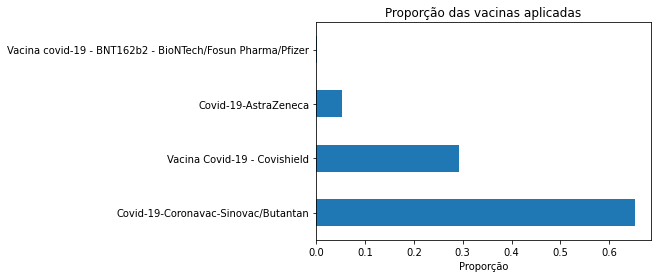

In [ ]:
plot_por_nome_vacina = nova_remocao['vacina_nome'].value_counts(normalize=True).plot(kind='barh')
plt.title('Proporção das vacinas aplicadas')
plt.xlabel('Proporção')
plt.show()

#### Nova remoção - média de vacinação por dia da semana

In [ ]:
quantidade_vacina_semana_dia = nova_remocao.groupby(['vacina_dataAplicacao_semana_ano', 'vacina_dataAplicacao_dia_semana']).agg('count')
quantidade_vacina_semana_dia.head()

paciente_id  ...  data_importacao_rnds
vacina_dataAplicacao_semana_ano vacina_dataAplicacao_dia_semana               ...                      
2                               6                                          1  ...                     1
3                               0                                          6  ...                     6
                                1                                        483  ...                   483
                                2                                       1964  ...                  1964
                                3                                       3564  ...                  3564

[5 rows x 21 columns]

In [ ]:
quantidade_vacina_semana_dia=quantidade_vacina_semana_dia.reset_index('vacina_dataAplicacao_dia_semana')
quantidade_vacina_semana_dia.head(1)

,vacina_dataAplicacao_dia_semana,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_nmmunicipio,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
vacina_dataAplicacao_semana_ano,,,,,,,,,,,,,,,,,,,,,,
2,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


[]

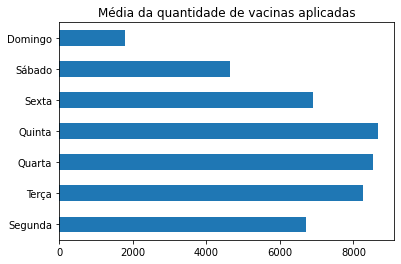

In [ ]:
plot_media=quantidade_vacina_semana_dia.groupby(['vacina_dataAplicacao_dia_semana'])['paciente_idade'].mean().plot(kind='barh')
plot_media.set_yticklabels(['Segunda', 'Terça','Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.title('Média da quantidade de vacinas aplicadas')
plt.ylabel('')
plt.plot()

#### Nova remoção - mediana de vacinação por dia da semana

[]

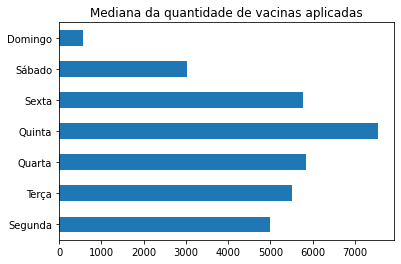

In [ ]:
plot_mediana=quantidade_vacina_semana_dia.groupby(['vacina_dataAplicacao_dia_semana'])['paciente_idade'].median().plot(kind='barh')
plot_mediana.set_yticklabels(['Segunda', 'Terça','Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.title('Mediana da quantidade de vacinas aplicadas')
plt.ylabel('')
plt.plot()

#### Nova remoção distribuição por sexo

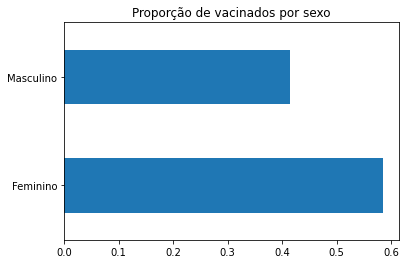

In [ ]:
plot_sexo = nova_remocao['paciente_enumsexobiologico'].value_counts(normalize=True).plot(kind='barh')
plt.title('Proporção de vacinados por sexo')
plot_sexo.set_yticklabels(['Feminino', 'Masculino'])
plt.show()

#### Formatando vacina_descricao_dose

In [ ]:
def funca(x):
  if '1' in x:
    return 1
  return 2
nova_remocao['vacina_descricao_dose_formatado'] = nova_remocao['vacina_descricao_dose'].apply(lambda x: funca(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
nova_remocao['vacina_dataaplicacao_dia_ano'] = pd.to_datetime(nova_remocao['vacina_dataaplicacao']).dt.dayofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Média Do Intervalo de Tempo entre a primeira e a segunda dose

In [ ]:
# retirando valores sem sentido, no caso pessoas que só tomaram a segunda dose
ambas_vacinas_tomadas = nova_remocao[nova_remocao.duplicated(subset=['paciente_id'], keep=False)]

In [ ]:
primeira_dose_dias_ano = ambas_vacinas_tomadas[ambas_vacinas_tomadas['vacina_descricao_dose_formatado'] == 1][['paciente_id','vacina_dataaplicacao_dia_ano','vacina_nome']]
segunda_dose_dias_ano = ambas_vacinas_tomadas[ambas_vacinas_tomadas['vacina_descricao_dose_formatado'] == 2][['paciente_id','vacina_dataaplicacao_dia_ano', 'vacina_nome']]

In [ ]:
segunda_dose_dias_ano['vacina_nome'].value_counts(normalize=True)

Covid-19-Coronavac-Sinovac/Butantan    0.938451
Vacina Covid-19 - Covishield           0.061334
Covid-19-AstraZeneca                   0.000215
Name: vacina_nome, dtype: float64

In [ ]:
duas_doses_df = pd.merge(primeira_dose_dias_ano, segunda_dose_dias_ano, on='paciente_id').set_index('paciente_id')

In [ ]:
duas_doses_df

,vacina_dataaplicacao_dia_ano_x,vacina_nome_x,vacina_dataaplicacao_dia_ano_y,vacina_nome_y
paciente_id,,,,
9e2f2c909e74f8c2ba26e97bf4c192790379735a53072e0eb938e8f511e8109e,17,Covid-19-Coronavac-Sinovac/Butantan,48,Covid-19-Coronavac-Sinovac/Butantan
ae39002a8f5783f418881eb4c657a44e27655709beb050acdec9e46a3bddadf4,18,Covid-19-Coronavac-Sinovac/Butantan,49,Covid-19-Coronavac-Sinovac/Butantan
e32e4e97b5b55ae878da46e048b15ac116648bb2c5a70e6e2434e07715e205e1,18,Covid-19-Coronavac-Sinovac/Butantan,49,Covid-19-Coronavac-Sinovac/Butantan
38fa7f5284638e6b209092518701832c192f9f63bfef70379925bda287814fe6,18,Covid-19-Coronavac-Sinovac/Butantan,49,Covid-19-Coronavac-Sinovac/Butantan
2d82ef77d42050358bc9790bf7bd41205713448daaca02f12bc1d03a1a9f9466,19,Covid-19-Coronavac-Sinovac/Butantan,49,Covid-19-Coronavac-Sinovac/Butantan
...,...,...,...,...
57a32d5d86f646898af5ec6466840cb7e8b9189755f255420aacff8f2873fc30,135,Covid-19-Coronavac-Sinovac/Butantan,135,Covid-19-Coronavac-Sinovac/Butantan
616315af737647b0dec342c3853059be57cd3ee33f9b5cfb0c8e730ec5656e7d,135,Covid-19-Coronavac-Sinovac/Butantan,135,Covid-19-Coronavac-Sinovac/Butantan
b0b3e7fd4439fd393706754cbc2fc9233530764da66f68c37afe72e4ca388f2d,135,Covid-19-Coronavac-Sinovac/Butantan,135,Covid-19-Coronavac-Sinovac/Butantan


In [ ]:
duas_doses_df['diff']= duas_doses_df[['vacina_dataaplicacao_dia_ano_x', 'vacina_dataaplicacao_dia_ano_y']].diff(axis=1)['vacina_dataaplicacao_dia_ano_y']

In [ ]:
# removendo ruídos
duas_doses_df = duas_doses_df[duas_doses_df['diff'] > 0]

In [ ]:
media_coronavac = duas_doses_df[duas_doses_df['vacina_nome_x'] == 'Covid-19-Coronavac-Sinovac/Butantan']['diff'].mean()
media_astrazeneca = duas_doses_df[duas_doses_df['vacina_nome_x'] == 'Covid-19-AstraZeneca']['diff'].mean()
media_covishield = duas_doses_df[duas_doses_df['vacina_nome_x'] == 'Vacina Covid-19 - Covishield']['diff'].mean()

In [ ]:
print('Média Geral: %.2f' % duas_doses_df['diff'].mean())

Média Geral: 27.41


In [ ]:
print('Média Coronavac: %.2f' % media_coronavac)
print('Média Astrazeneca: %.2f' % media_astrazeneca)
print('Média Covishield: %.2f' % media_covishield)

Média Coronavac: 23.56
Média Astrazeneca: 26.91
Média Covishield: 84.79


#### Distribuição das vacinas por grupo de atendimento (primeira e segunda dose)

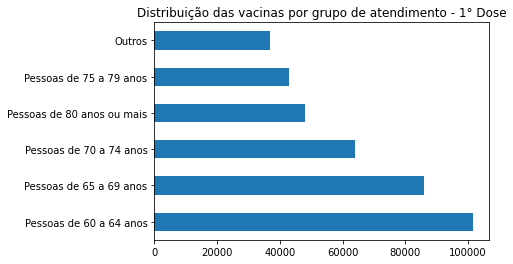

In [ ]:
plot_grupo_atendimento = nova_remocao[nova_remocao['vacina_descricao_dose_formatado']==1]['vacina_grupoatendimento_nome'].value_counts()[:6].plot(kind='barh')
plt.title('Distribuição das vacinas por grupo de atendimento - 1° Dose')
plt.show()

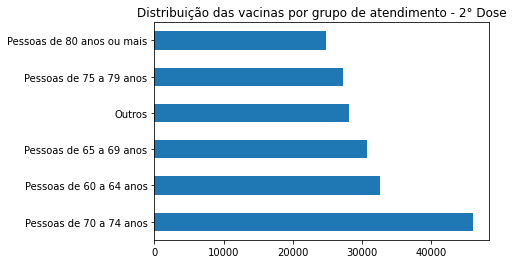

In [ ]:
nova_remocao[nova_remocao['vacina_descricao_dose_formatado']==2]['vacina_grupoatendimento_nome'].value_counts()[:6].plot(kind='barh')
plt.title('Distribuição das vacinas por grupo de atendimento - 2° Dose')
plt.show()

#### Primeira e segunda dose por semana na nova_remocao

In [ ]:
primeira_dose = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 1]['vacina_descricao_dose_formatado'].groupby(nova_remocao['vacina_dataAplicacao_semana_ano']).count()
primeira_dose.head()

vacina_dataAplicacao_semana_ano
2        1
3    13564
4    23324
5    18365
6    11323
Name: vacina_descricao_dose_formatado, dtype: int64

In [ ]:
segunda_dose = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 2]['vacina_descricao_dose_formatado'].groupby(nova_remocao['vacina_dataAplicacao_semana_ano']).count()
segunda_dose.head()

vacina_dataAplicacao_semana_ano
3       40
4       36
5       52
6    10662
7    12548
Name: vacina_descricao_dose_formatado, dtype: int64

In [ ]:
width=0.4

In [ ]:
plt.style.use('ggplot')

[]

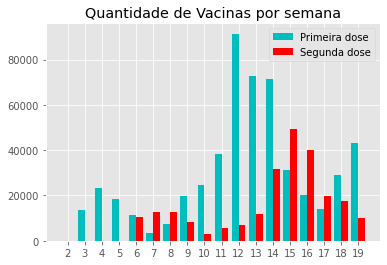

In [ ]:
plt.bar(primeira_dose.index, height=primeira_dose.values,color='#00bebe', width=width, label='Primeira dose')
plt.bar(segunda_dose.index + width, height=segunda_dose.values,color='red', width=width, label= 'Segunda dose')
plt.xticks(primeira_dose.index + width / 2, tuple(primeira_dose.index))
plt.title('Quantidade de Vacinas por semana')
plt.legend()
plt.plot()

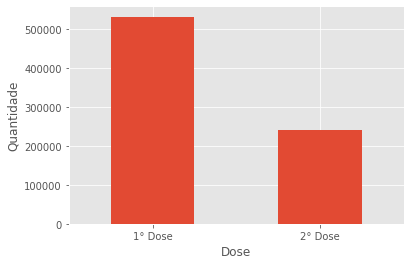

In [ ]:
plot_dose = nova_remocao['vacina_descricao_dose_formatado'].value_counts().plot(kind='bar')
plt.xlabel('Dose')
plt.ylabel('Quantidade')
plot_dose.set_xticklabels(['1° Dose', '2° Dose'])
plt.xticks(rotation=0)
plt.show()

# Modelos De Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from datetime import datetime,date,timedelta
from dateutil.relativedelta import relativedelta

In [ ]:
def gerar_acumulado(x):
  valor_acumulado = 0
  valores = []
  for valor_semana in x:
    valor_acumulado = valor_acumulado + valor_semana
    valores.append(valor_acumulado)
  return valores

In [ ]:
nova_remocao['vacina_dataAplicacao_dia_ano'] = pd.to_datetime(nova_remocao['vacina_dataaplicacao']).dt.dayofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Modelo Regressão Linear Para A Primeira Dose

##### Utilizando Dias

In [ ]:
nova_remocao['vacina_dataAplicacao_dia_ano'].head()

643469    17
246373    18
737684    18
775474    18
51458     18
Name: vacina_dataAplicacao_dia_ano, dtype: int64

In [ ]:
primeira_dose_dia = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 1]['vacina_descricao_dose_formatado'].groupby(nova_remocao['vacina_dataAplicacao_dia_ano']).count()
primeira_dose_dia

vacina_dataAplicacao_dia_ano
17        1
18        3
19      481
20     1955
21     3557
       ... 
131    8935
132    9755
133    8624
134    6890
135    2055
Name: vacina_descricao_dose_formatado, Length: 119, dtype: int64

In [ ]:
primeira_dose_acumulado_dia = gerar_acumulado(primeira_dose_dia)

In [ ]:
primeira_dose_acumulado_dia[:6]

[1, 4, 485, 2440, 5997, 11485]

In [ ]:
primeira_dose_dia_df = pd.DataFrame(data={'valor_dia': primeira_dose_dia.values, 'valor_acumulado': primeira_dose_acumulado_dia}, index=primeira_dose_dia.index)

In [ ]:
primeira_dose_dia_df.head()

,valor_dia,valor_acumulado
vacina_dataAplicacao_dia_ano,,
17,1,1
18,3,4
19,481,485
20,1955,2440
21,3557,5997


In [ ]:
X = primeira_dose_dia_df['valor_acumulado'].values.reshape(-1,1)
y = primeira_dose_dia_df.index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
simple_model = LinearRegression()
simple_model.fit(X_train,y_train)
predictions = simple_model.predict(X_test)
mean_squared_error(y_test, predictions)

118.18620242080623

###### Criando Modelo De Regressão Linear

In [ ]:
model_dia = LinearRegression()

In [ ]:
model_dia.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pop_total = np.array([3337357]).reshape(-1,1)
prediction_all_dia = model_dia.predict(pop_total)

In [ ]:
prediction_all_dia

array([657.1409905])

In [ ]:
start_dia = datetime(2021,1,17)
data_final_primeira_dose_dia = start_dia + timedelta(round(prediction_all_dia[0]))

In [ ]:
data_final_primeira_dose_dia

datetime.datetime(2022, 11, 5, 0, 0)

###### Gráfico Quantidade Acumulada

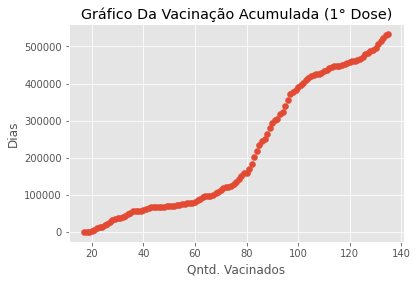

In [ ]:
plt.scatter(y, X)
plt.title('Gráfico Da Vacinação Acumulada (1° Dose)')
plt.xlabel('Qntd. Vacinados')
plt.ylabel('Dias')
plt.show()

###### Utilizando Cross Validation Com TimeSeriesSplit

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

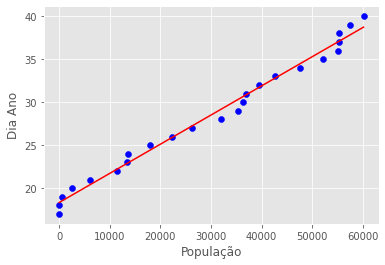

Soma dos Erros ao Quadrado (SSE): 1480 
Erro Quadrático Médio (MSE): 77.92
Erro Médio Absoluto (MAE): 7.88
Raiz do Erro Quadrático Médio (RMSE): 8.83 
R2-score: -31.28



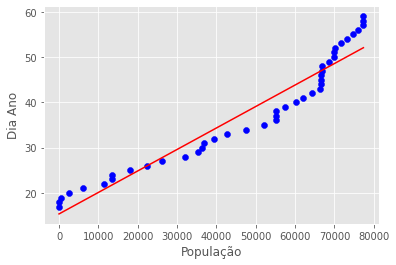

Soma dos Erros ao Quadrado (SSE): 308 
Erro Quadrático Médio (MSE): 16.22
Erro Médio Absoluto (MAE): 3.26
Raiz do Erro Quadrático Médio (RMSE): 4.03 
R2-score: 0.81



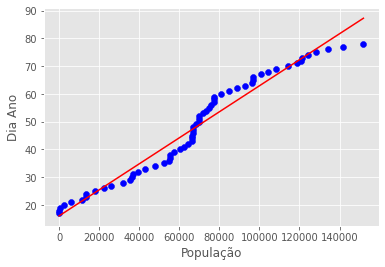

Soma dos Erros ao Quadrado (SSE): 60853 
Erro Quadrático Médio (MSE): 3202.80
Erro Médio Absoluto (MAE): 50.67
Raiz do Erro Quadrático Médio (RMSE): 56.59 
R2-score: -2.41



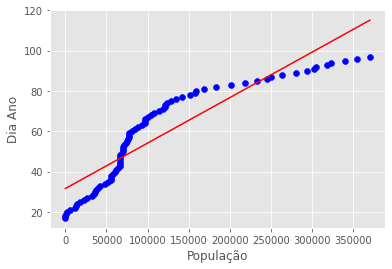

Soma dos Erros ao Quadrado (SSE): 7149 
Erro Quadrático Médio (MSE): 376.28
Erro Médio Absoluto (MAE): 19.36
Raiz do Erro Quadrático Médio (RMSE): 19.40 
R2-score: -14.93



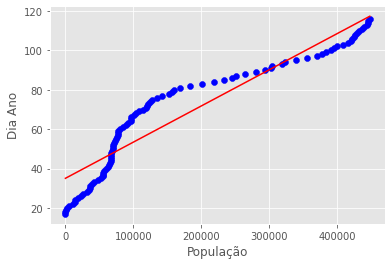

Soma dos Erros ao Quadrado (SSE): 127 
Erro Quadrático Médio (MSE): 6.68
Erro Médio Absoluto (MAE): 2.30
Raiz do Erro Quadrático Médio (RMSE): 2.58 
R2-score: 0.72



In [ ]:
tscv = TimeSeriesSplit(n_splits = 5)
mean_squared_error_array = []
mean_absolute_error_array = []
sum_error_squared_array = []
r2_score_array = []
sqrt_rmse_array = []
for train_index, test_index in tscv.split(X):
  model_dia_cross = LinearRegression()
  X_train,X_test = X[train_index], X[test_index]
  y_train,y_test = y[train_index], y[test_index]
  model_dia_cross.fit(X_train,y_train)
  predictions = model_dia_cross.predict(X_test)
  plt.scatter(X_train, y_train, color='blue')
  plt.plot(X_train, model_dia_cross.coef_[0]*X_train + model_dia_cross.intercept_, '-r')
  plt.ylabel("Dia Ano")
  plt.xlabel("População")
  plt.show()
  error = mean_squared_error(y_test, predictions)
  abs_error = mean_absolute_error(y_test, predictions)
  sum_error_squared = np.sum((predictions - y_test)**2)
  r2 = r2_score(predictions , y_test)
  rmse =  sqrt(error)
  print("Soma dos Erros ao Quadrado (SSE): %2.f " % sum_error_squared)
  print("Erro Quadrático Médio (MSE): %.2f" % error)
  print("Erro Médio Absoluto (MAE): %.2f" % abs_error)
  print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % rmse)
  print("R2-score: %.2f" %  r2)
  print()
  mean_squared_error_array.append(error)
  mean_absolute_error_array.append(abs_error)
  sum_error_squared_array.append(sum_error_squared)
  r2_score_array.append(r2)
  sqrt_rmse_array.append(rmse)

In [ ]:
print("Média das Somas dos Erros ao Quadrado (SSE): %2.f " % np.mean(sum_error_squared_array))
print("Média dos Erros Quadrático Médio (MSE): %.2f" % np.mean(mean_squared_error_array))
print("Média dos Erros Médios Absolutos (MAE): %.2f" % np.mean(mean_absolute_error_array))
print("Média das Raízes do Erros Quadrático Médio (RMSE): %.2f " % np.mean(sqrt_rmse_array))
print("Média dos R2-score: %.2f" %  np.mean(r2_score_array))

Média das Somas dos Erros ao Quadrado (SSE): 13984 
Média dos Erros Quadrático Médio (MSE): 735.98
Média dos Erros Médios Absolutos (MAE): 16.69
Média das Raízes do Erros Quadrático Médio (RMSE): 18.29 
Média dos R2-score: -9.42


###### Utilzando Regressão Polinomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

Polinomial De Grau:  1


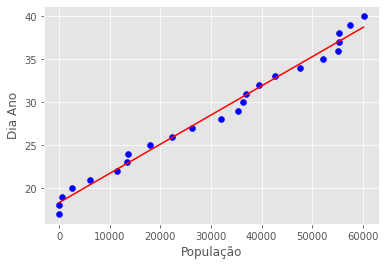

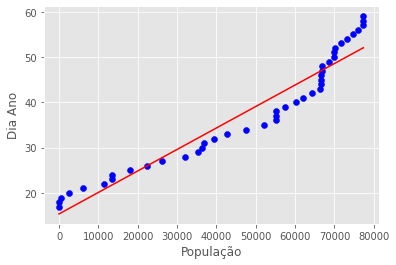

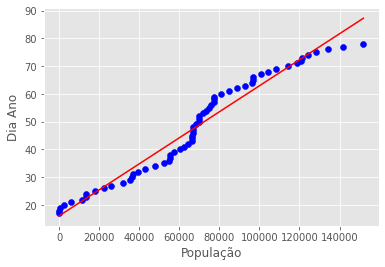

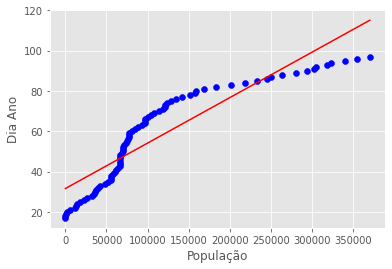

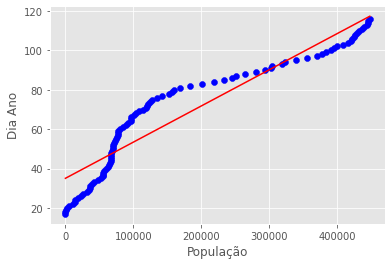

Erro quadrático médio no grau (1.00) = 735.98

Polinomial De Grau:  2


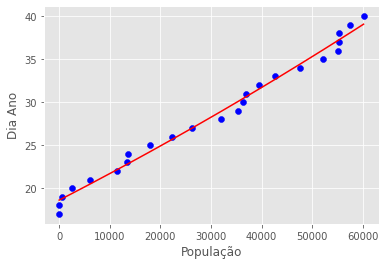

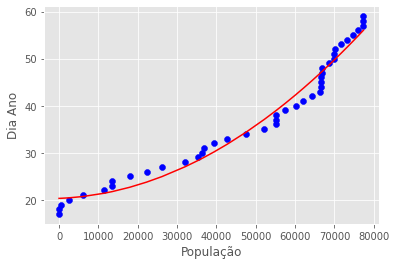

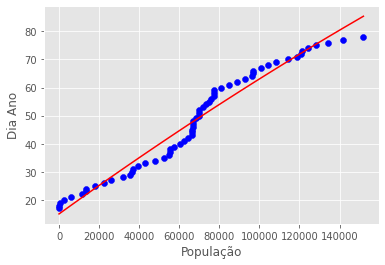

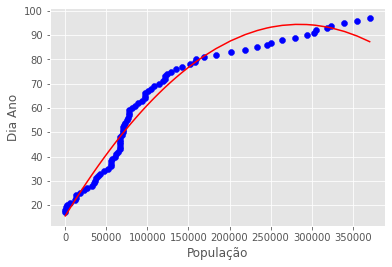

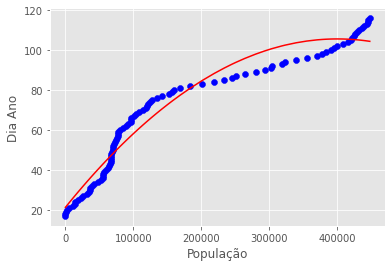

Erro quadrático médio no grau (2.00) = 902.57

Polinomial De Grau:  3


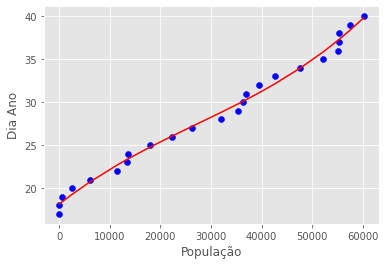

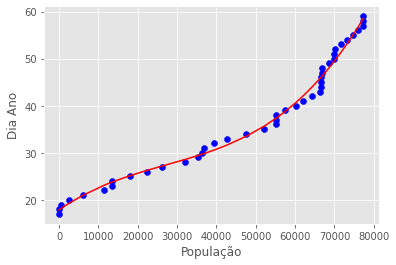

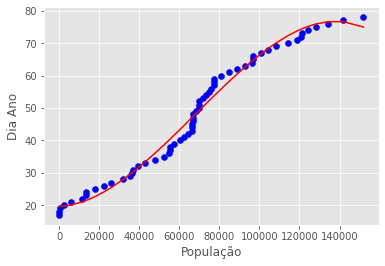

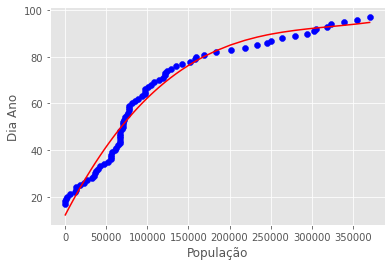

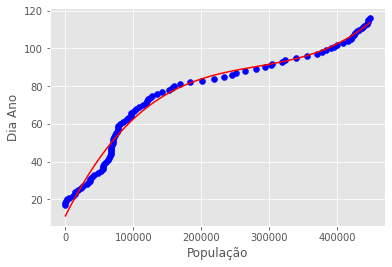

Erro quadrático médio no grau (3.00) = 41653.84

Polinomial De Grau:  4


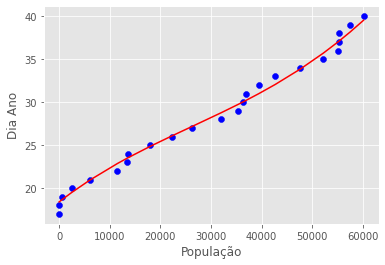

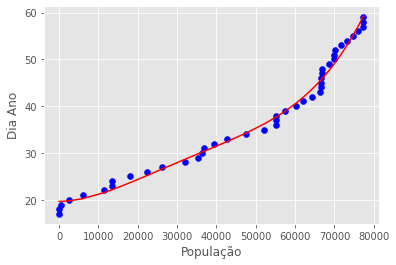

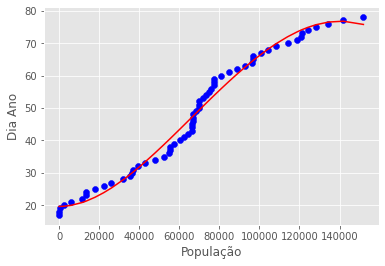

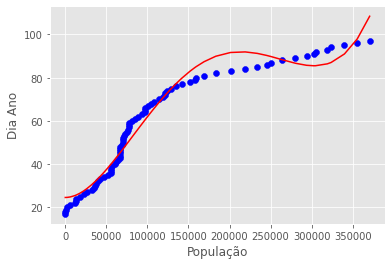

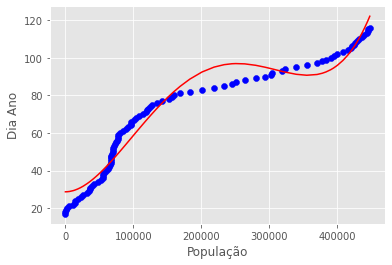

Erro quadrático médio no grau (4.00) = 29480.19

Polinomial De Grau:  5


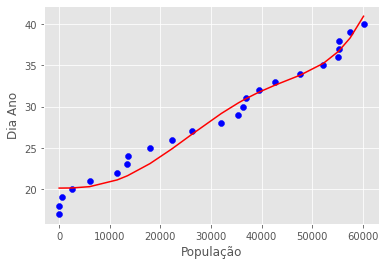

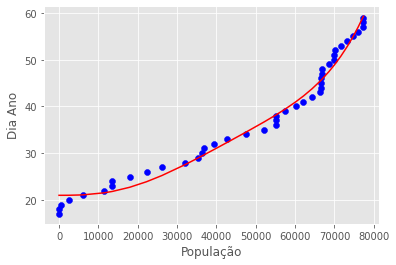

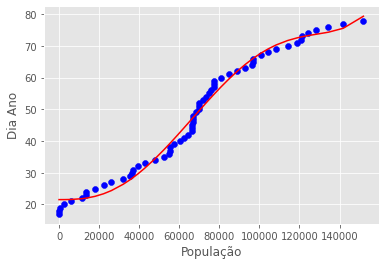

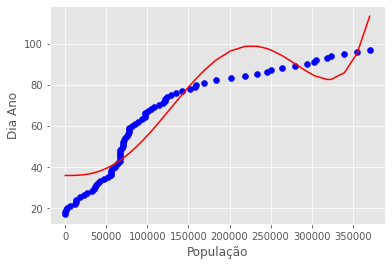

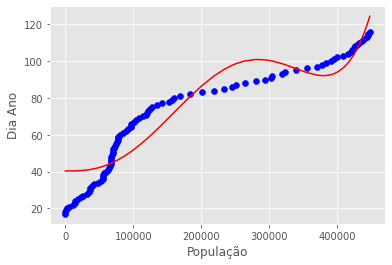

Erro quadrático médio no grau (5.00) = 8201567.71



In [ ]:
mean_error_squared_for_polynomial = []
for i in range(5):
  tscv = TimeSeriesSplit(n_splits = 5)
  mean_squared_error_array = []
  print('Polinomial De Grau: {grau: .0f}'.format(grau = i+1))
  for train_index, test_index in tscv.split(X):
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    poly = PolynomialFeatures(degree = i+1)
    X_poly = poly.fit_transform(X_train)
    model_for_poly = LinearRegression()
    model_for_poly.fit(X_poly, y_train)
    predictions = model_for_poly.predict(poly.fit_transform(X_test))
    plt.scatter(X_train, y_train, color='blue')
    plt.plot(X_train, model_for_poly.predict(poly.fit_transform(X_train)), '-r')
    plt.ylabel("Dia Ano")
    plt.xlabel("População")
    plt.show()
    error = mean_squared_error(y_test, predictions)
    mean_squared_error_array.append(error)
  mean_error_squared_for_polynomial.append(np.mean(mean_squared_error_array))
  print('Erro quadrático médio no grau ({grau:.2f}) = {media:.2f}'.format(grau=i+1, media=np.mean(mean_squared_error_array)))
  print()

In [ ]:
mean_error_squared_for_polynomial

[735.9789921720824,
 902.5684584827839,
 41653.84131195421,
 29480.185558313075,
 8201567.708586641]

### Modelo De Regressão Linear Para A Segunda Dose

In [ ]:
segunda_dose_dia = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 2]['vacina_descricao_dose_formatado'].groupby(nova_remocao['vacina_dataAplicacao_dia_ano']).count()
segunda_dose_dia

vacina_dataAplicacao_dia_ano
18        3
19        2
20        9
21        7
22       11
       ... 
131    3208
132    2030
133    1427
134     886
135     972
Name: vacina_descricao_dose_formatado, Length: 115, dtype: int64

In [ ]:
segunda_dose_acumulado_dia = gerar_acumulado(segunda_dose_dia)
segunda_dose_acumulado_dia[:5]

[3, 5, 14, 21, 32]

In [ ]:
segunda_dose_dia_df = pd.DataFrame(data={'valor_dia': segunda_dose_dia.values, 'valor_acumulado': segunda_dose_acumulado_dia}, index=segunda_dose_dia.index)
segunda_dose_dia_df.head()

,valor_dia,valor_acumulado
vacina_dataAplicacao_dia_ano,,
18,3,3
19,2,5
20,9,14
21,7,21
22,11,32


In [ ]:
X_segunda_dose = segunda_dose_dia_df['valor_acumulado'].values.reshape(-1,1)
y_segunda_dose = segunda_dose_dia_df.index

#### Criando Modelo De Regressão Linear Para a segunda dose

In [ ]:
model_dia_segunda_dose = LinearRegression()

In [ ]:
model_dia_segunda_dose.fit(X_segunda_dose, y_segunda_dose)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pop_total = np.array([3337357]).reshape(-1,1)
prediction_all_dia_segunda_dose = model_dia_segunda_dose.predict(pop_total)

In [ ]:
prediction_all_dia_segunda_dose

array([1374.98684515])

In [ ]:
start_dia_segunda_dose = datetime(2021,1,18)
data_final_segunda_dose_dia= start_dia_segunda_dose + timedelta(round(prediction_all_dia_segunda_dose[0]))

In [ ]:
data_final_segunda_dose_dia

datetime.datetime(2024, 10, 24, 0, 0)

###### Gráfico Quantidade Acumulada

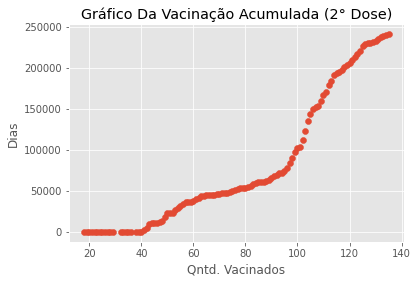

In [ ]:
plt.scatter(y_segunda_dose, X_segunda_dose)
plt.title('Gráfico Da Vacinação Acumulada (2° Dose)')
plt.xlabel('Qntd. Vacinados')
plt.ylabel('Dias')
plt.show()

###### Utilizando Cross Validation Com TimeSeriesSplit

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt

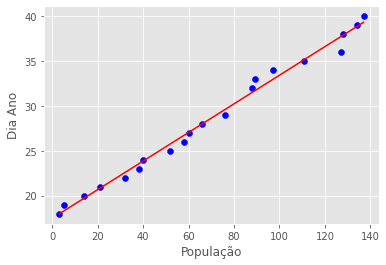

Soma dos Erros ao Quadrado (SSE): 261178793 
Erro Quadrático Médio (MSE): 13746252.26
Erro Médio Absoluto (MAE): 3267.79
Raiz do Erro Quadrático Médio (RMSE): 3707.59 
R2-score: -3.45



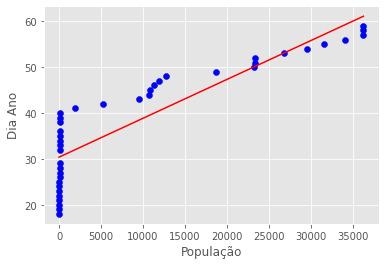

Soma dos Erros ao Quadrado (SSE): 106 
Erro Quadrático Médio (MSE): 5.58
Erro Médio Absoluto (MAE): 2.07
Raiz do Erro Quadrático Médio (RMSE): 2.36 
R2-score: 0.51



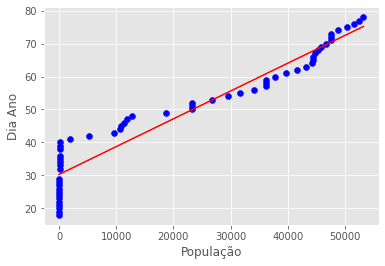

Soma dos Erros ao Quadrado (SSE): 300 
Erro Quadrático Médio (MSE): 15.77
Erro Médio Absoluto (MAE): 3.74
Raiz do Erro Quadrático Médio (RMSE): 3.97 
R2-score: 0.69



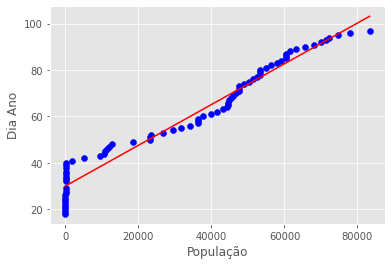

Soma dos Erros ao Quadrado (SSE): 63390 
Erro Quadrático Médio (MSE): 3336.34
Erro Médio Absoluto (MAE): 52.46
Raiz do Erro Quadrático Médio (RMSE): 57.76 
R2-score: -2.81



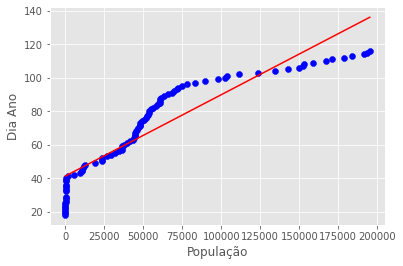

Soma dos Erros ao Quadrado (SSE): 10652 
Erro Quadrático Médio (MSE): 560.64
Erro Médio Absoluto (MAE): 23.61
Raiz do Erro Quadrático Médio (RMSE): 23.68 
R2-score: -11.22



In [ ]:
tscv = TimeSeriesSplit(n_splits = 5)
mean_squared_error_array = []
mean_absolute_error_array = []
sum_error_squared_array = []
r2_score_array = []
sqrt_rmse_array = []
for train_index, test_index in tscv.split(X_segunda_dose):
  model_dia_cross = LinearRegression()
  X_train,X_test = X_segunda_dose[train_index], X_segunda_dose[test_index]
  y_train,y_test = y_segunda_dose[train_index], y_segunda_dose[test_index]
  model_dia_cross.fit(X_train,y_train)
  predictions = model_dia_cross.predict(X_test)
  plt.scatter(X_train, y_train, color='blue')
  plt.plot(X_train, model_dia_cross.coef_[0]*X_train + model_dia_cross.intercept_, '-r')
  plt.ylabel("Dia Ano")
  plt.xlabel("População")
  plt.show()
  error = mean_squared_error(y_test, predictions)
  abs_error = mean_absolute_error(y_test, predictions)
  sum_error_squared = np.sum((predictions - y_test)**2)
  r2 = r2_score(predictions , y_test)
  rmse =  sqrt(error)
  print("Soma dos Erros ao Quadrado (SSE): %2.f " % sum_error_squared)
  print("Erro Quadrático Médio (MSE): %.2f" % error)
  print("Erro Médio Absoluto (MAE): %.2f" % abs_error)
  print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % rmse)
  print("R2-score: %.2f" %  r2)
  print()
  mean_squared_error_array.append(error)
  mean_absolute_error_array.append(abs_error)
  sum_error_squared_array.append(sum_error_squared)
  r2_score_array.append(r2)
  sqrt_rmse_array.append(rmse)

In [ ]:
print("Média das Somas dos Erros ao Quadrado (SSE): %2.f " % np.mean(sum_error_squared_array))
print("Média dos Erros Quadrático Médio (MSE): %.2f" % np.mean(mean_squared_error_array))
print("Média dos Erros Médios Absolutos (MAE): %.2f" % np.mean(mean_absolute_error_array))
print("Média das Raízes do Erros Quadrático Médio (RMSE): %.2f " % np.mean(sqrt_rmse_array))
print("Média dos R2-score: %.2f" %  np.mean(r2_score_array))

Média das Somas dos Erros ao Quadrado (SSE): 52250648 
Média dos Erros Quadrático Médio (MSE): 2750034.12
Média dos Erros Médios Absolutos (MAE): 669.93
Média das Raízes do Erros Quadrático Médio (RMSE): 759.07 
Média dos R2-score: -3.26


# Outros

In [ ]:
# primeira_dose_quantidade = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 1]['vacina_descricao_dose_formatado'].groupby(nova_remocao['vacina_dataAplicacao_semana_ano']).count()
# primeira_dose_coronavac = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 1]['Covid-19-Coronavac-Sinovac/Butantan'].groupby(nova_remocao['vacina_dataAplicacao_semana_ano']).sum()
# primeira_dose_covishield = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 1]['Vacina Covid-19 - Covishield'].groupby(nova_remocao['vacina_dataAplicacao_semana_ano']).sum()
# primeira_dose_astra = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 1]['Covid-19-AstraZeneca'].groupby(nova_remocao['vacina_dataAplicacao_semana_ano']).sum()
# primeira_dose_fizer = nova_remocao[nova_remocao['vacina_descricao_dose_formatado'] == 1]['Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer'].groupby(nova_remocao['vacina_dataAplicacao_semana_ano']).sum()
